이론 페이지 :  
- https://www.notion.so/leew-work/CH05-318bd25e12c34cce8f69039ee387c9f2

In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D

from keras.applications.vgg16 import VGG16

이론부터 보고 오라,,,  
https://www.notion.so/leew-work/CH05-1-CNN-318bd25e12c34cce8f69039ee387c9f2

### 목표 
- 앞에서 본 MNIST 예제를 수정해 MLP 대신에 CNN 사용하려고 한다. 
- 데이터를 읽어들이고 데이터셋을 들여다 본다. 
- Keras가 제공하는 새로운 Fashion Data 보려고 한다. 

데이터셋 : MNIST와 동일한 28X28 이미지,  
라벨 : 숫자가 아니라 패션 아이템들   
  
각 아이템에 대한 레이블 값을 지정하기 위해 레이블 배열 사용할 예정 

In [2]:
# keras가 제공하는 mnist 데이터셋 읽기 
dataset = keras.datasets.fashion_mnist

In [3]:
# 이미지에 대한 레이블 
print(dir(dataset))

class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'load_data']


In [4]:
# 훈련 데이터와 테스트 데이터 로드 
(img_rows, img_cols) = (28, 28)
(x_train, y_train), (x_test, y_test) = dataset.load_data()

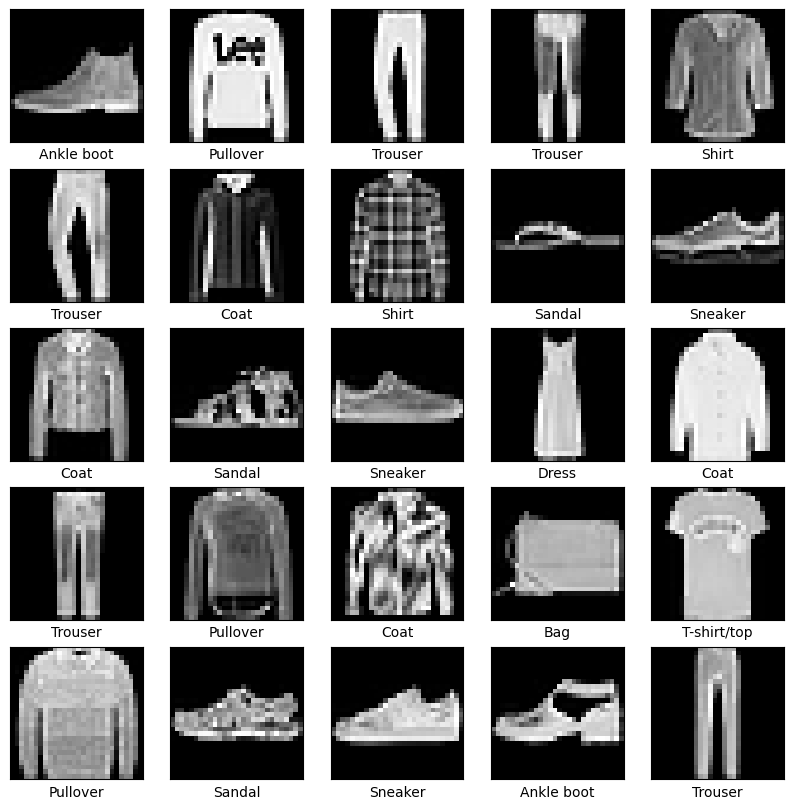

In [5]:
# 몇 개의 데이터 샘플을 그려 보자,, 
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([]) # Remove the y-axis ticks and labels
    plt.grid(False)
    
    plt.imshow(x_test[i], cmap=plt.cm.gray)
    plt.xlabel(class_names[y_test[i]])
    
plt.show()

### CNN 구축 

이론으로 살핀 몇 가지 층들로 CNN 구축  
- 이미지 차원 2차원 유지
- Conv + Pooling 적용 
- Output 층 : Flatten + 10개의 출력(Softmax) Dense Layer 

![nn](img/01.PNG)

데이터 선처리:  
1. 정수값인 Y를 One-Hot Vector화 
2. X값들을 0~1 범위의 실수로 정규화 
3. numpy의 expand_dim 함수 사용해 `(num_samples, 28, 28)` -> `(num_samples, 28, 28, 1)`

In [6]:
# 선처리 

# 1. Y[Scalar -> One-Hot Vector]
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# 2. X값들을 0~1 범위의 실수로 정규화 
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
print(x_train.shape) # (num_samples, 28, 28)

# 3. expand_dims : 데이터를 CNN에 쓰기 좋게 모양 바꾸기 
x_train_cnn = np.expand_dims(x_train, -1)
x_test_cnn = np.expand_dims(x_test, -1)
x_train_cnn.shape

(60000, 28, 28)


(60000, 28, 28, 1)

층 구축 : 
1. 32개를 가진 Convolution 층 
2. 4x4 MaxPooling2D 
3. 10 크기의 Flatten(dense)

In [8]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D

In [9]:
model = Sequential() # 한 모델을 담는 컨테이너 

# keras.layers.Conv2D(32, 3, activation='relu')(x)
model.add(
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same')
)
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#  모델의 최적화기를 할당하고 손실 함수를 정의 
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

model.summary()

c:\Users\com\anaconda3\envs\keras-env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        15,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,010 (62.54 KB)

 Trainable params: 16,010 (62.54 KB)

 Non-trainable params: 0 (0.00 B)

앞 절의 MLP와 비교하면,  
- CNN의 파라미터 혹은 가중치 : 16,010
- MLP의 경우 : 407,050  
  
줄어든 이유 : convolution 층 / pooling 층을 사용했기 때문 

convolution 층 :  
이전 층에서 들어오는 입력 전체에 대해서 작은 크기의 동일한 필터를 반복해서  
convolve해 사용하기 때문 

모델을 훈련시켜 보자. 

In [10]:
# 실제 훈련 시행 
history = model.fit(x_train_cnn, y_train, epochs=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7607 - loss: 0.7120


In [11]:
# 테스트 데이터를 사용한 평가 
model.evaluate(x_test_cnn, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.8648 - loss: 0.3874


[0.39000600576400757, 0.8586999773979187]

이 데이터는 MNIST보다 더 복잡한 데이터이므로, 첫 번째 epoch에서는 더 낮은 정확도  
MLP를 사용해도 비슷한 정확도를 얻을 수 있지만, 모델 크기가 훨씬 커진다. 

epoch를 늘려 가면 정확도는 점차 좋아질 것이다.  
시간에 따른 정확도/손실을 그림으로 그려 보고자 한다. 

In [12]:
history = model.fit(x_train_cnn, y_train, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8728 - loss: 0.3581
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8879 - loss: 0.3142
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8959 - loss: 0.2948
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8983 - loss: 0.2837
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9033 - loss: 0.2701
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9065 - loss: 0.2636
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9076 - loss: 0.2567
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9114 - loss: 0.2495
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9131 - loss: 0.2444
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9159 - loss: 0.2378
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9170 - loss: 0.2335
Epoch 12/20
1875/1875 ━━━━━━━━

In [26]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

이제 이력 변수(history variable)에 저장된 학습 이력을 가져다 그림을 그려 보자.  

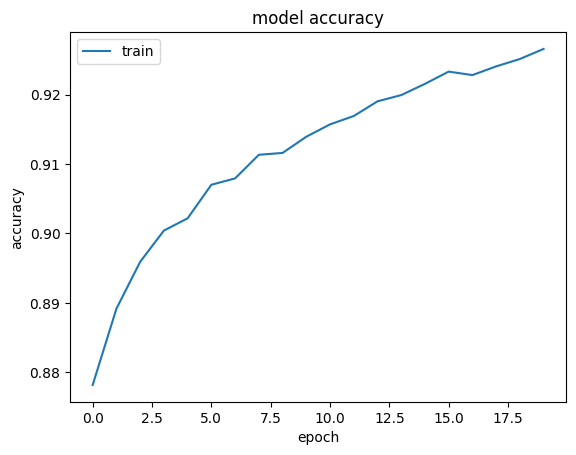

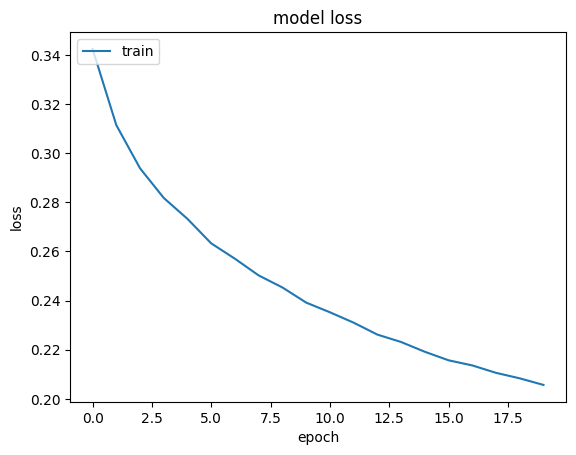

In [23]:
# 정확도 이력을 요약 
plt.plot(history.history['accuracy']) # acc라는 키워드가 삭제됨 
# plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show() 


# 손실 이력을 요약 
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc="upper left")
plt.show()

### CNN 하이퍼파라미터 - 사전 훈련된 VGGNet 모델로 훈련하기 

하이퍼파라미터 관련 이론 정리 페이지 :  
- https://www.notion.so/leew-work/CH05-2-CNN-d164e128bd1a4166a627bc3f4473782c

다음은 VGG-16 사전 훈련된 모델을 keras에서 가져오는 과정이다. 

In [27]:
from keras.applications.vgg16 import VGG16

In [28]:
# model 인스턴스 생성
model = VGG16()

# 모델 요약 정보 보기
print(model.summary())

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

None


신경망을 이용하여 예측 수행해보자.  
1. 인터넷에서 샘플 이미지 다운받아서 저장하자. 
    - https://upload.wikimedia.org/wikipedia/commons/f/fe/Amtrak_Train_161.jpg
    - img/mytest.jpg
2. 읽어들인 사전 훈련된 모델로 이미지 분류 
    - preprocess_input 같은 함수 사용해 이미지 정규화함으로써 VGG가 가장 잘 예측할 수 있는 데이터 형태로 입력할 것 

In [32]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input 
from keras.applications.vgg16 import decode_predictions

In [36]:
# 파일에서 이미지 읽어들이기 - VGG의 입력 크기는 (224, 224)
myImg = load_img('img/mytest.jpg', target_size=(224, 224))

# 이미지 픽셀을 numpy 배열로 변환 
myimg = img_to_array(myImg)
print("before expand_dims:", myimg.shape)
myimg = np.expand_dims(myImg, axis=0)
print("after expand_dims(Image Shape to feed VGG16 Net):", myimg.shape)

before expand_dims: (224, 224, 3)
after expand_dims(Image Shape to feed VGG16 Net): (1, 224, 224, 3)


In [37]:
# VGG 모델에 적합하도록 이미지 선처리 
myimg = preprocess_input(myimg)
print(type(myimg), myimg.shape)

# 1000개의 클래스에 대한 예측 확률 
pred = model.predict(myimg)
print('Predictions array shape:', pred.shape, type(pred))

<class 'numpy.ndarray'> (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
Predictions array shape: (1, 1000) <class 'numpy.ndarray'>


In [47]:
# 확률을 클래스 레이블로 변환 
label = decode_predictions(pred)
# print(label[0])
# [
    # ('n03272562', 'electric_locomotive', 0.8706871), # label[0][0]
    # ('n03895866', 'passenger_car', 0.1075333), 
    # ('n03393912', 'freight_car', 0.019700456), 
    # ('n04310018', 'steam_locomotive', 0.0009202345), 
    # ('n02917067', 'bullet_train', 0.0008108783)
# ]

# 가장 가능성이 높은(즉, 확률이 제일 높은) 결과를 가져옴 
label = label[0][0]


# 분류 결과를 출력 
print('Predicted class: %s (.%2f%%)' % (label[1], label[2] * 100))

Predicted class: electric_locomotive (.87.068713%)


데이터셋 링크 만료되어서 직접 만들었다. 

구조 :  
```
ㄴ training
	ㄴ CocaCola
		ㄴ cocacola1.png
		ㄴ cocacola2.png
		ㄴ cocacola3.png
		ㄴ cocacola4.png
		ㄴ cocacola5.png
	ㄴ Pepsi
		ㄴ pepsi1.png
		ㄴ pepsi2.png
		ㄴ pepsi3.png
		ㄴ pepsi4.png
		ㄴ pepsi5.png
ㄴ validation
	ㄴ CocaCola
		ㄴ cocacola1.png
		ㄴ cocacola2.png
		ㄴ cocacola3.png
		ㄴ cocacola4.png
		ㄴ cocacola5.png
	ㄴ Pepsi
		ㄴ pepsi1.png
		ㄴ pepsi2.png
		ㄴ pepsi3.png
		ㄴ pepsi4.png
		ㄴ pepsi5.png
```

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# 그냥 keras로 하면 에러남 

ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (c:\Users\com\anaconda3\envs\keras-env\lib\site-packages\keras\preprocessing\image\__init__.py)

In [56]:
# 훈련 및 검증 이미지를 위한 폴더 지정 
training_dir = './cola/training'
validation_dir = './cola/validation'

# 한 번에 한 개씩 이미지를 생성한다. 이것을 batch로 처리할 수도 있다. 
gen_batch_size = 1

# 훈련 데이터를 생성하는 생성기(Generator)를 만든다. 
# 새 이미지에 대해 변환과 회전을 적용한다. 
# 아이디어는 실제 세계에서 볼 수 있는 다양한 변형을 포착하는 것이다. 
train_datagen = ImageDataGenerator(
    rescale = 1./255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    fill_mode="nearest", 
    width_shift_range=0.3,
    height_shift_range=0.3, 
    rotation_range=20, 
    horizontal_flip=False
)

Found 10 images belonging to 2 classes.
<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>
 Generating images now...   


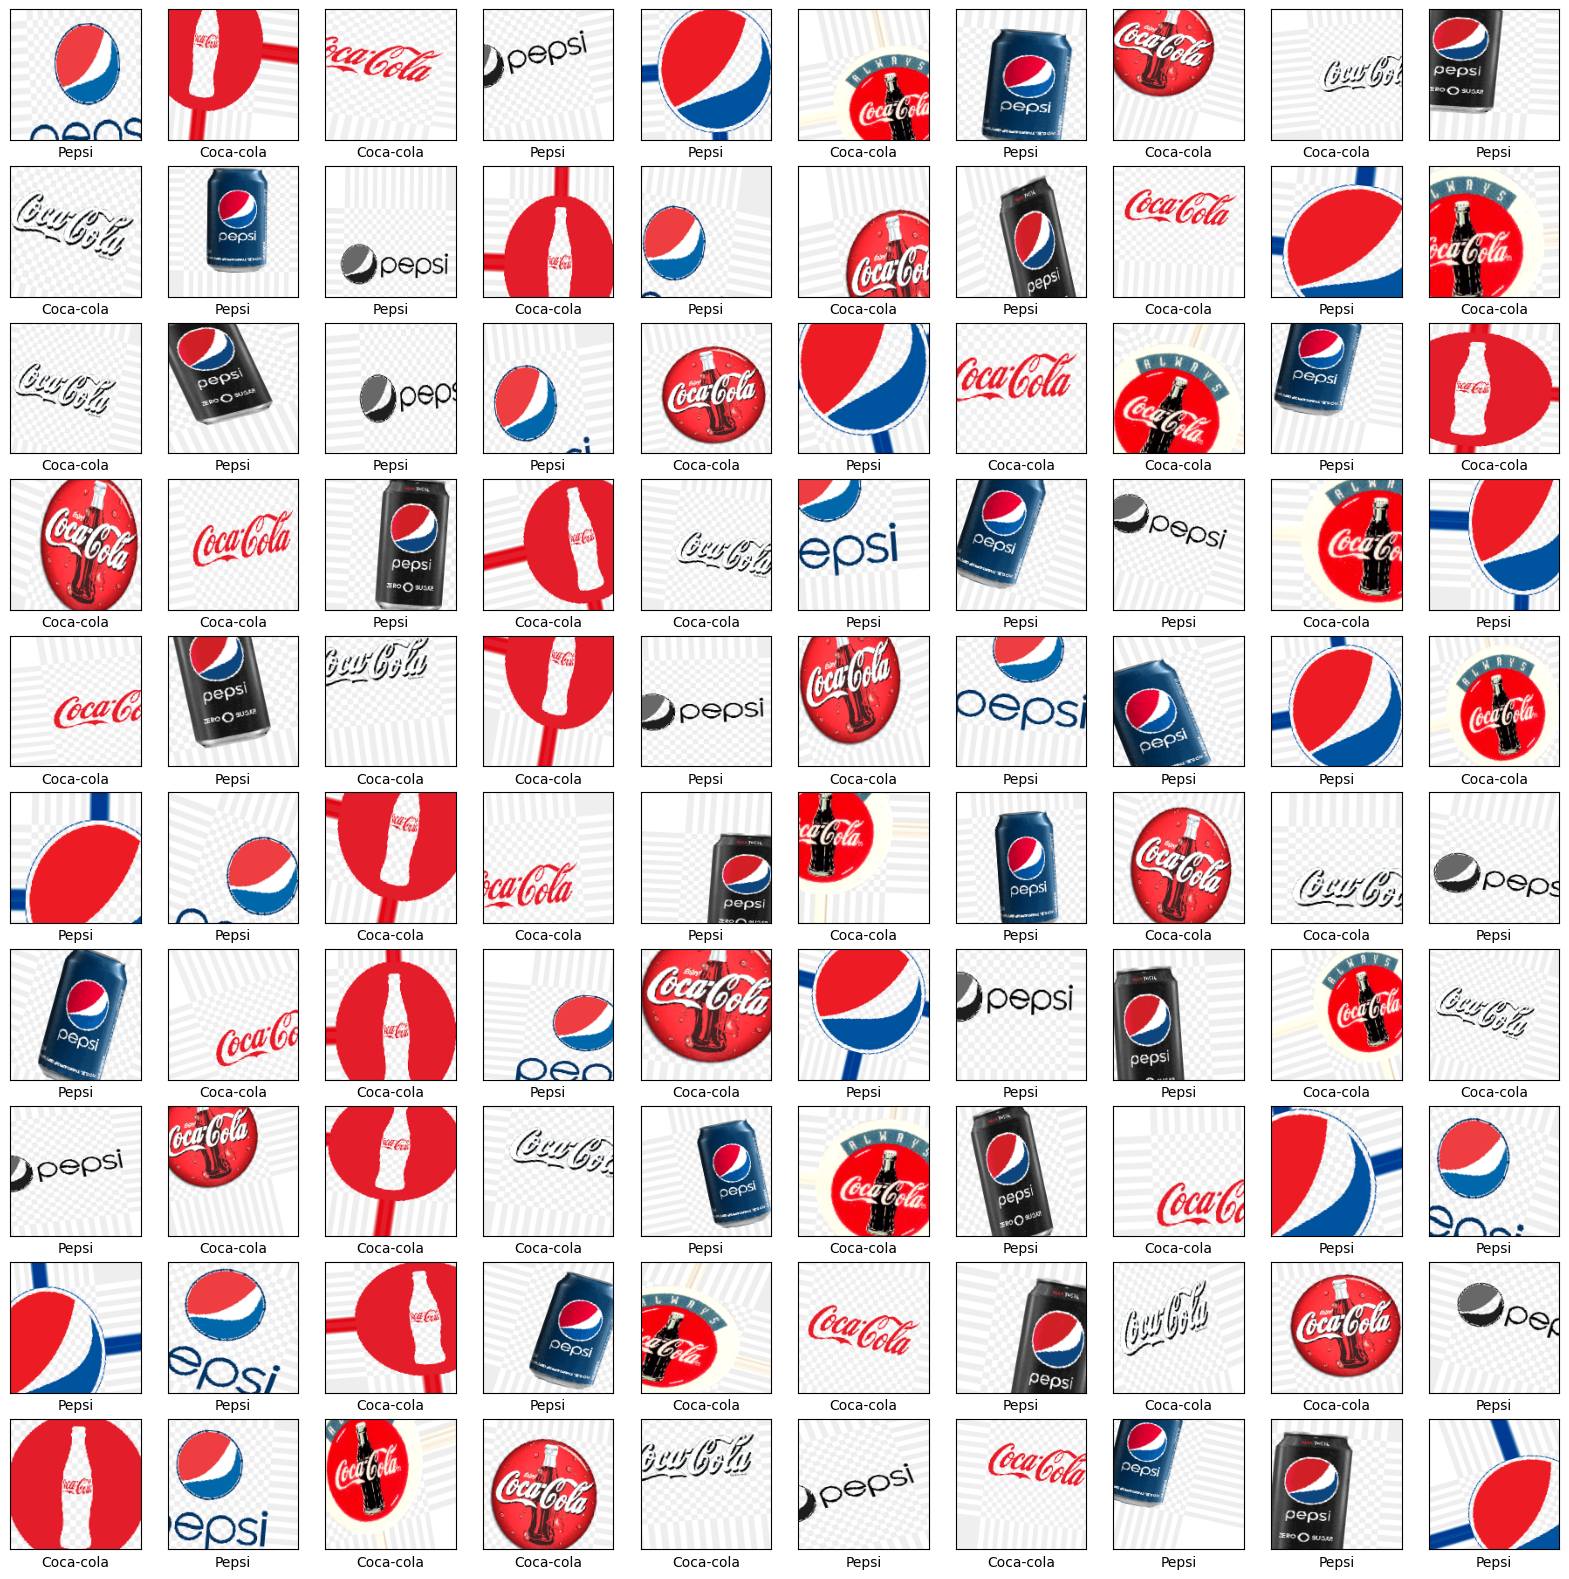

In [60]:
"""
하위 폴더들에 있는 사진들을 읽어서
보강된 이비지들을 batch 단위로 무한히 생성하는 
생성기(Generator)
"""
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(150, 150),
    batch_size=gen_batch_size, 
    class_mode='binary'
)

# binary_crossentropy 비용 함수를 사용하므로 이진 레이블이 필요하다. 
# 생성기는 class를 0과 1로 표시한다. 
class_names = ['Coca-cola', 'Pepsi']

# 이미지를 생성하고, 이미지를 표시해 보자. 
print(' Generating images now...   ')
ROW = 10
plt.figure(figsize=(20, 20))
for i in range(ROW*ROW):
    plt.subplot(ROW, ROW, i + 1)
    plt.xticks([])
    
    # 생성기를 실행시켜 다음 이미지를 구한다 - 이 작업을 끝없이 반복할 수도 있다. 
    next_set = train_generator.__next__()
    plt.imshow(next_set[0][0])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[int(next_set[1][0])])

plt.show()

생성 후 사전 구축된 VGG16 모델로 구축할 예정 

- 전이 학습을 이용해 모델 재사용할 예정

→ headless 모드 

- 완전 연결 학습층은 제외하고 특징 추출 층만 로드되도록
    
    (Conv layer만 로드)  
-> 완전 연결 층은 직접 생성 및 초기화하여 모델 적용

In [61]:
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras import Model
from keras import optimizers 


# 모델에 입력으로 사용할 이미지의 크기 설정 
# 이 크기는 생성기가 구축할 이미지의 크기와 같다. 
img_width, img_height = 150, 150

In [62]:
# VGG16 모델을 'headless' 모드로 load = include_top=False
model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(img_width, img_height, 3) # RGB Color 
)

# 훈련시키고 싶지 않은 특성 추출층들을 고정한다. 
for layer in model.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [64]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [66]:
# 이진 분류 문제를 위해 별도로 만든 층을 추가한다. 
x = model.output 
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# 사용할 최종 모델 설정 
model_final = Model(model.input, predictions)
# model_final = Model(input=model.input, output=predictions) 로 하면 에러 남, **kwargs 있는데,, 왜??? 

# 새 모델에 대한 요약 정보 보기
model_final.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,942,401 (72.26 MB)

 Trainable params: 4,227,713 (16.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

headless 방식 참고자료 :  
https://m.blog.naver.com/win0k/221678437787

In [67]:
validation_dir = './cola/validation'

# 한 번에 한 이미지씩 생성한다 - batch로도 할 수 있다. 
gen_batch_size = 1


# 검증 데이터를 생성하는 생성기를 만든다. 
# 이 생성기에는 픽셀 값 크기만 조정한다. 
validation_datagen = ImageDataGenerator(rescale=1./255)

# 이것이 훈련용과 유사한 검증용 데이터 생성기
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150), 
    batch_size=gen_batch_size, 
    class_mode='binary'
)

Found 10 images belonging to 2 classes.


훈련에서는, 1 epoch당 1,000 step을 사용
  
= 1,000개의 이미지를 생성해 그것들을 훈련에 사용할 것 
  
여기서는 2 epoch 동안만 훈련 사용할 것

In [73]:
# 모델의 훈련 
"""
fit_generator 함수는 deprecated -> 교재와는 다른 방식으로 사용해야 함 
"""
# model_final.fit_generator(
#     train_generator, 
#     steps_per_epoch=1000, 
#     epochs=2, 
#     validation_data = validation_generator, 
#     validation_steps=100
# )

# Valueerror : You must call `compile()` before using the model
model_final.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_final.fit(
    train_generator, 
    steps_per_epoch=1000, 
    epochs=2, 
    validation_data = validation_generator, 
    validation_steps=100
)

Epoch 1/2


   1/1000 ━━━━━━━━━━━━━━━━━━━━ 20:01 1s/step - accuracy: 1.0000 - loss: 0.4983

c:\Users\com\anaconda3\envs\keras-env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  10/1000 ━━━━━━━━━━━━━━━━━━━━ 1:04 65ms/step - accuracy: 0.6699 - loss: 1.5351

c:\Users\com\anaconda3\envs\keras-env\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5017 - loss: 1.7652 - val_accuracy: 0.5000 - val_loss: 0.9721
Epoch 2/2
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step - accuracy: 0.6000 - loss: 1.2552 - val_accuracy: 0.6000 - val_loss: 0.5097


정식 데이터셋을 사용하지 않아 loss가 높다. val_accuracy도 높다.  
이제 훈련된 모델을 사용해 몇 개의 예측을 수행해 보자. 

테스트 데이터도 없어서 그냥 임의로 만들어서 했다. 

In [74]:
###### 예측 ######
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

# 이미지를 읽고, 화면에 표시하고, 예측하는 함수
def predict_for(img_name):
    # 파일에서 이미지 로드 - VGG16의 입력은 (224, 224)
    myimg = load_img(img_name, target_size=(150, 150))
    plt.imshow(myimg)
    plt.show()
    
    # 이미지 픽셀들을 배열로 변환 
    myimg = img_to_array(myimg)
    myimg = np.expand_dims(myimg, axis=0)
    
    # VGG 모델을 위한 이미지 준비 
    myimg = preprocess_input(myimg)
    
    # 1000개의 모든 클래스에 대해 확률 예측 
    pred = int(model_final.predict(myimg)[0][0])
    print('prediction for %s: %s' %(img_name, class_names[pred]))

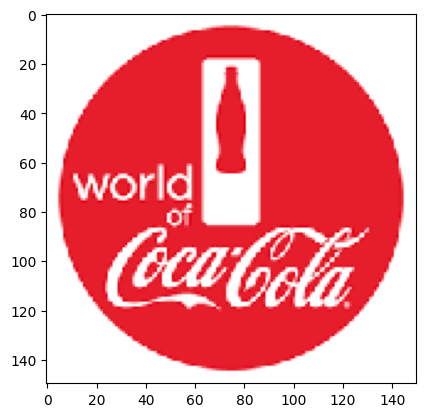

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
prediction for ./cola/test1.png: Coca-cola


In [75]:
predict_for('./cola/test1.png')

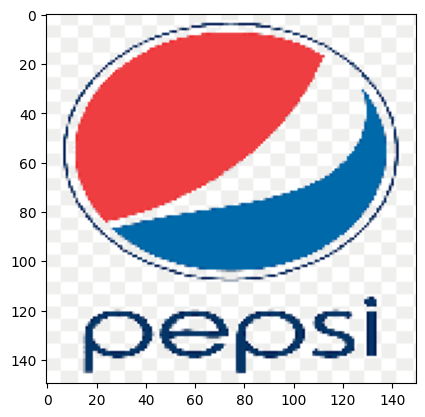

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
prediction for ./cola/test2.png: Pepsi


In [76]:
predict_for('./cola/test2.png')

In [77]:
model_final.save('my_logo_model.h5')